In [1]:
from pyigm.cgm import cgmsurvey
from linetools.spectra.io import readspec
import linetools
import matplotlib.pyplot as plt
import astropy.units as u
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"
# %matplotlib notebook


def get_qsoname_from_string(filename):
    """ Find the QSO name (JXXXX+XXXX) in a string, usually the file path.

    Args:
        filename (str): path with qso file

    Returns:
        qsoname (str): qso name (JXXXX+XXXX)


    """
    #if "J0226+001" not in filename:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 10]
    #else:
    #    qso_name = filename[filename.find('J'):filename.find('J') + 9]
    qso_name = filename[filename.find('J'):filename.find('J') + 10]

    return qso_name

def attach_spectra(cgm_survey, data_path='../data/spectra/'):
    """ Give each component and line a QSO spectrum to plot. 
    
    Arguments:
        cgm_survey {pyigm.cgm.cgmsurvey.CGMAbsSurvey} -- The object containing all of the CGM Survey data.
    
    Keyword Arguments:
        data_path {str} -- Where to look for the spectra (default: {'../data/spectra/'})
    """
    for name in cgm_survey._data['Name']:
        # get the base name from the longer form associated with cgm abs systems
        qso_name = get_qsoname_from_string(name)
        # point to the correct path
        specfile = data_path+qso_name+'_nbin3_norm.fits'
        # crate an Xspec1D object from the spec
        spec = readspec(specfile)
        # attach the spec object to each absorption line in each component for each galaxy
        cgm_abs_sys = cgm_survey.get_cgmsys(name)
        for comp in cgm_abs_sys._components:
            for absline in comp._abslines:
                absline.analy['spec'] = spec

def print_comps_and_lines(cgm_survey, cgm_name):
    """Given a `cgm_name` from the survey, print the components and absorption lines contained in
        each component.    

    
    Arguments:
        cgm_survey {pyigm.cgm.cgmsurvey.CGMAbsSurvey} -- The object containing all of the CGM Survey data.
        
        cgm_name {str} -- the cgm name, usually QSO name plus position angle. 
    """
    cgm_abs_sys = cgm_survey.get_cgmsys(cgm_name)
    for i, comp in enumerate(cgm_abs_sys._components):
        print(i, comp.name)
        for aline in comp._abslines:
            print('\t',aline.name)


def cgmsys_stack_plot(cgm_survey, cgm_name, save=False, fig_path='../'):
    """Create a stack plot(s) for each absorption line in each component associated with the cgm system 
    (galaxy-absorber pair)
    
    Arguments:
        cgm_survey {[type]} -- [description]
        cgm_name {[type]} -- [description]
    
    Keyword Arguments:
        save {bool} -- [description] (default: {False})
        fig_path {str} -- [description] (default: {'../'})
    """
    # get the specific galaxy/cgmabssys name
    cgm_abs_sys = cgm_survey.get_cgmsys(cgm_name)

    fig_list = []
    for i, comp in enumerate(cgm_abs_sys._components):
        print('----------------------------')
        # print where the spectra is located to view in linetools
        spec_path = comp._abslines[0].analy['spec'].filename
        # this should be the galaxy redshift
        redshift = str(cgm_abs_sys.z)
        print("lt_xspec "+spec_path+" -z "+redshift)
        print('----------------------------')
        print(i, comp.name)
        print('----------------------------')
        fig = linetools.analysis.plots.stack_plot(comp._abslines, 
                                                  return_fig=True, 
                                                  figsz=(9,7), 
                                                  zref=cgm_abs_sys.z, 
                                                  vlim=[-300.,  300.]*u.km/u.s,
                                                  )
        fig_list.append(fig)
        if save:
            save_file = cgm_abs_sys.name + "_comp_" + comp.name+".pdf"
            print(f"Saving: {save_file} to {fig_path}")
            fig.savefig(fig_path+save_file)


### Load the survey

In [2]:
survey_file = '../data/cgmsquared_cgmsurvey_aodm_v4.json'
cgm_survey = cgmsurvey.CGMAbsSurvey.from_json(survey_file, chk_z=False, verbose=False, build_sys=True)
attach_spectra(cgm_survey, data_path='../data/spectra/')


read_sets: Using set file -- 
  /Users/mwilde/python/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


# Specify your cgm system here! 

In [3]:
cgm_name = 'J1233-0031_247_12'


In [4]:
cgm_abs_sys = cgm_survey.get_cgmsys(cgm_name)

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
0 HI_z0.31818
----------------------------


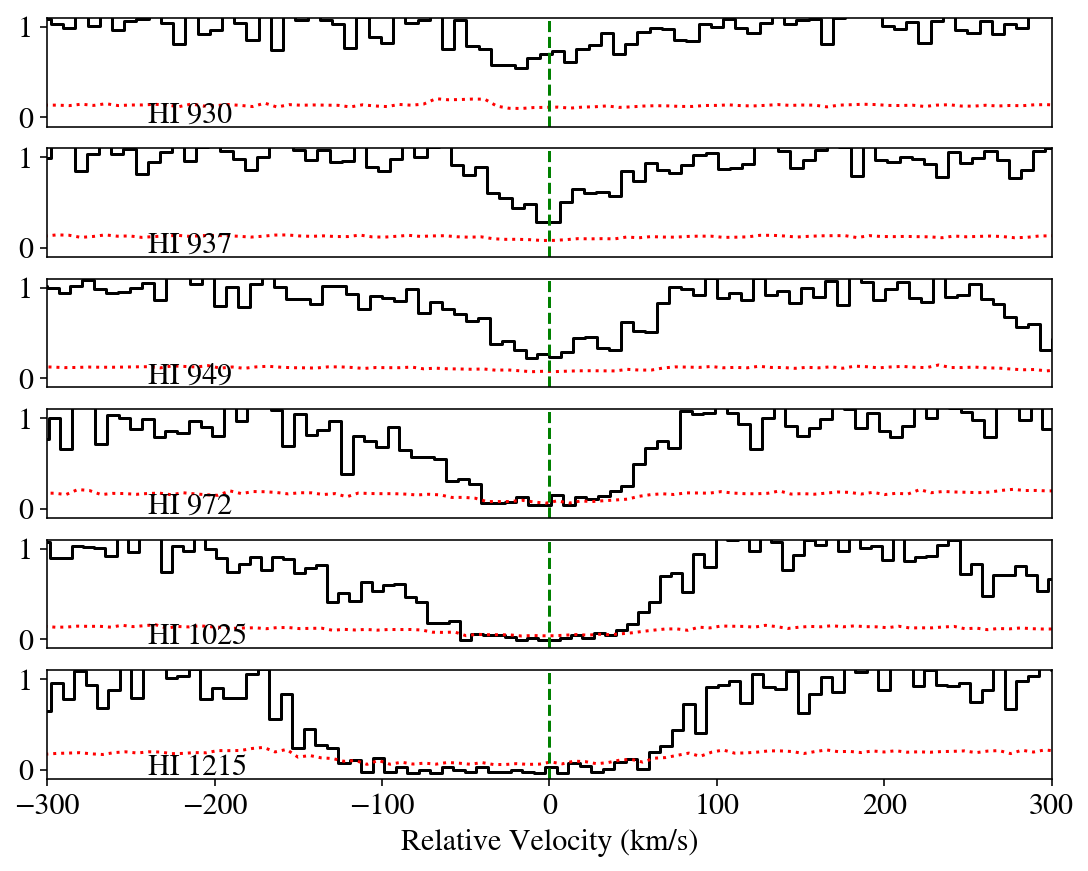

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
1 OVI_z0.31820
----------------------------


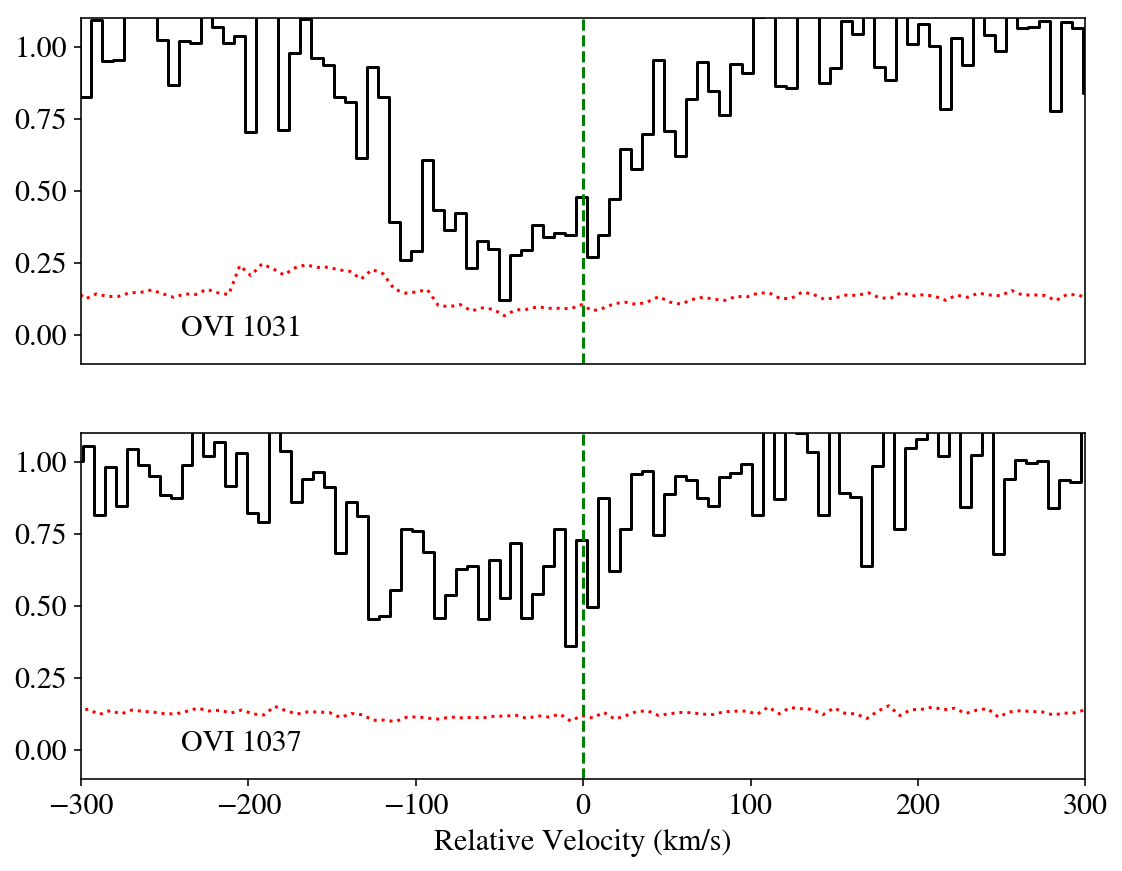

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
2 CIII_z0.31820
----------------------------


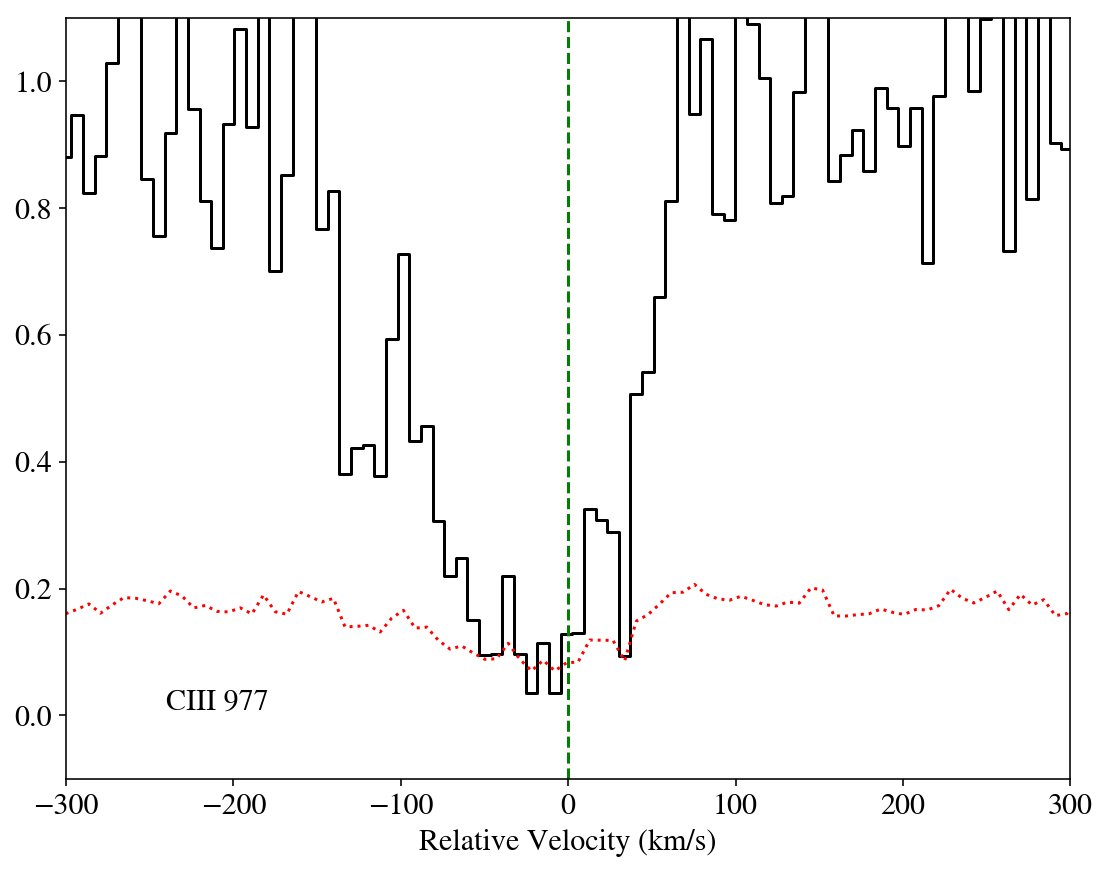

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
3 HI_z0.31849
----------------------------


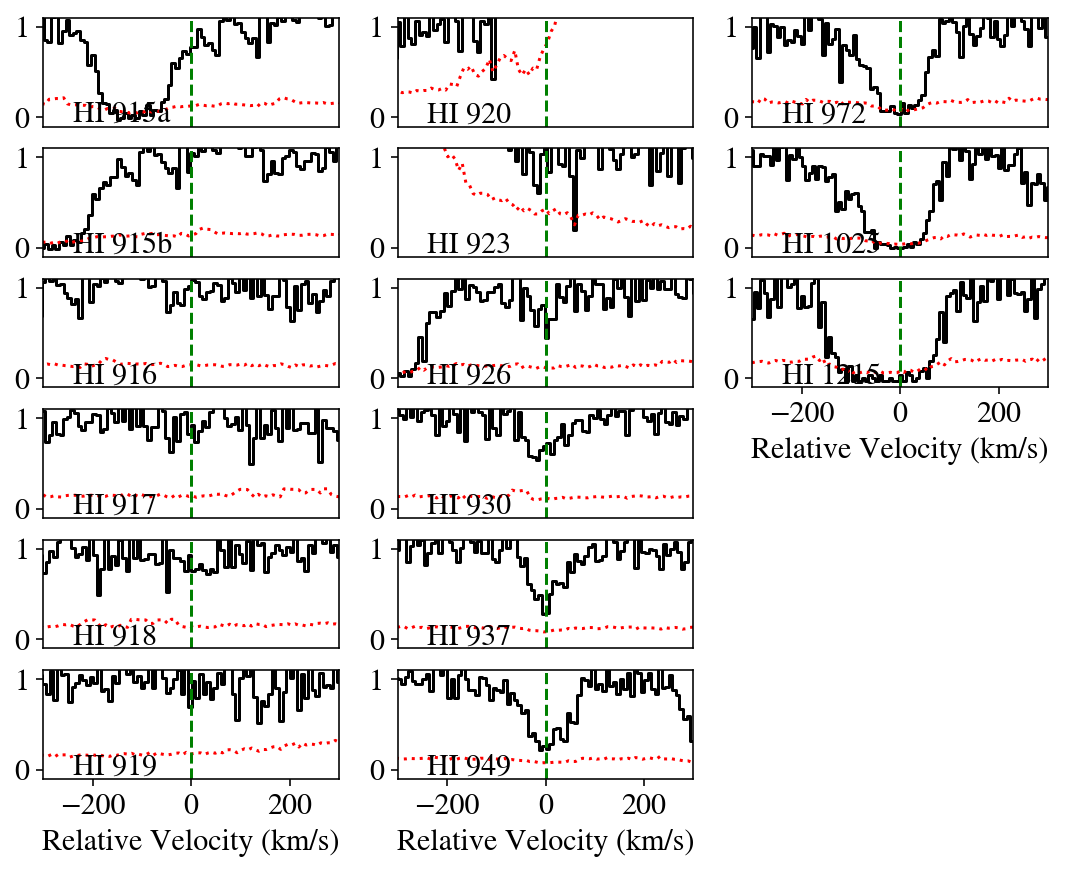

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
4 SVI_z0.31863
----------------------------


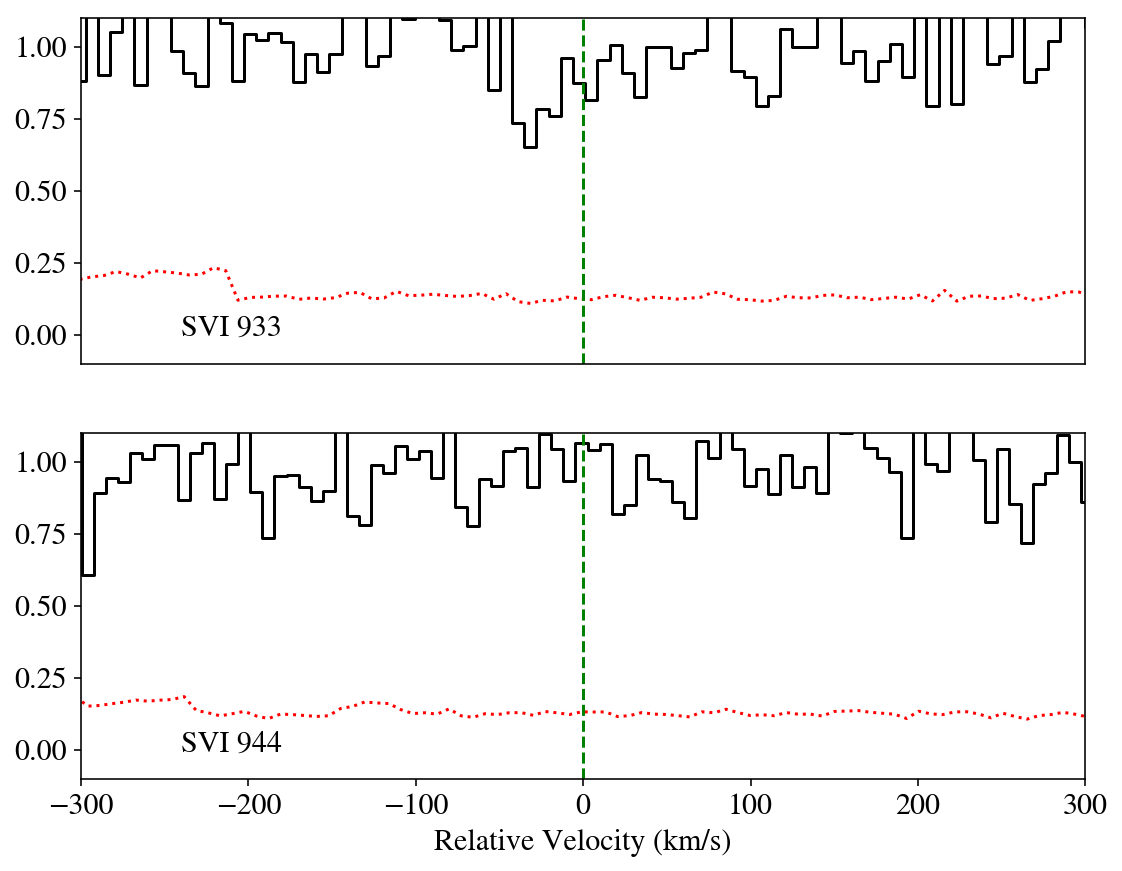

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
5 CIII_z0.31867
----------------------------


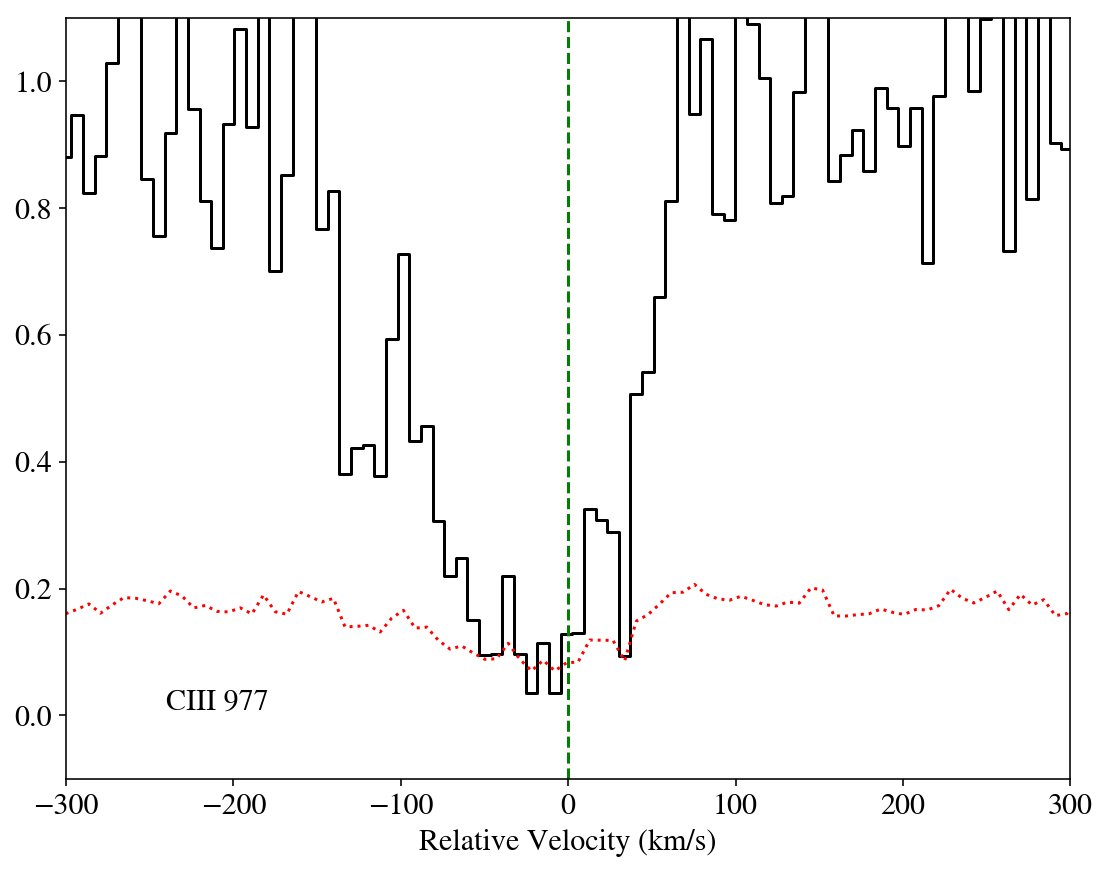

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
6 OVI_z0.31868
----------------------------


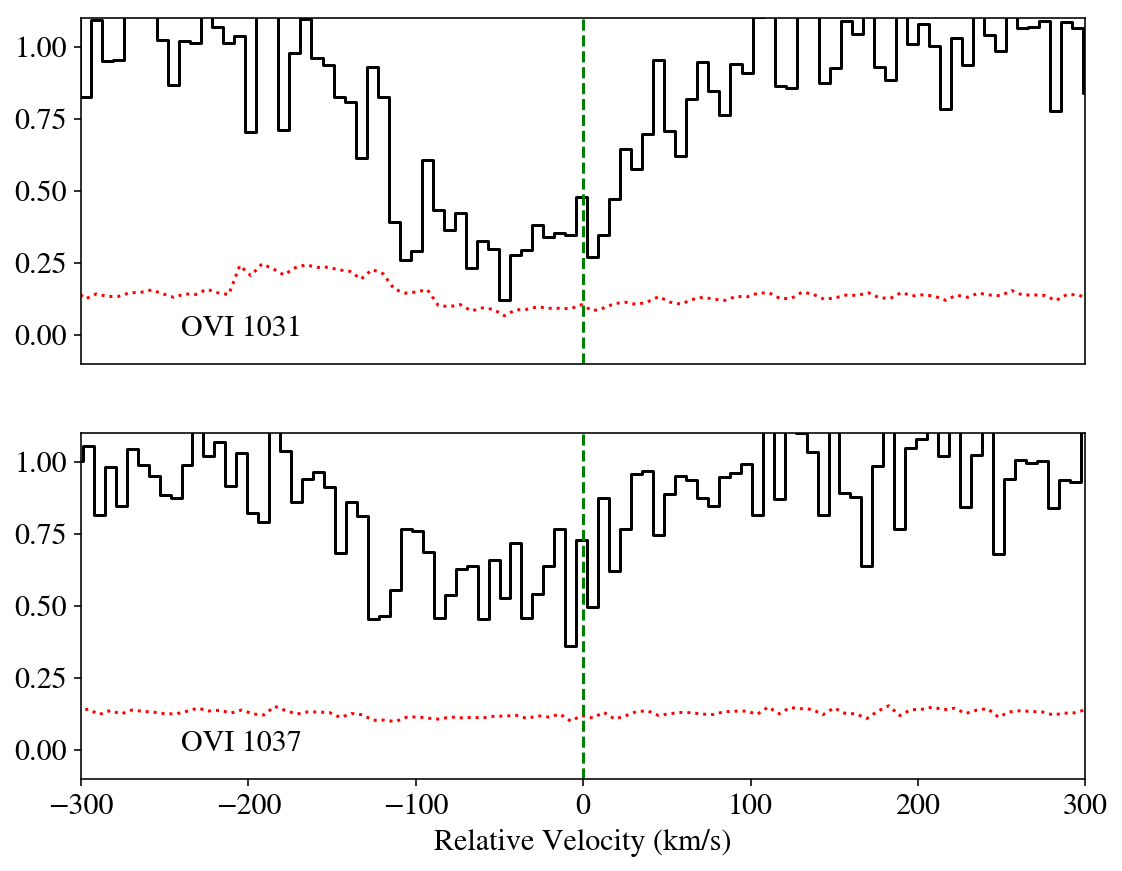

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
7 SiIII_z0.31871
----------------------------


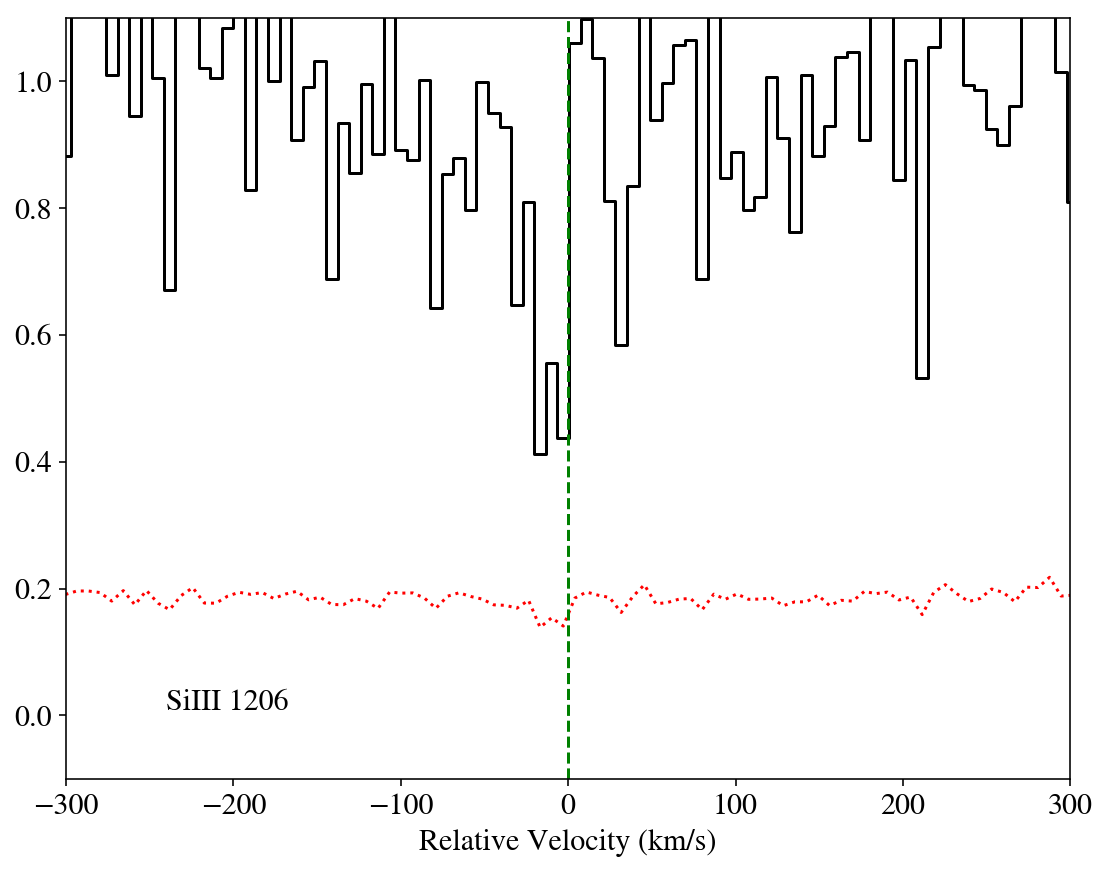

----------------------------
lt_xspec ../data/spectra/J1233-0031_nbin3_norm.fits -z 0.3187429
----------------------------
8 HI_z0.31878
----------------------------


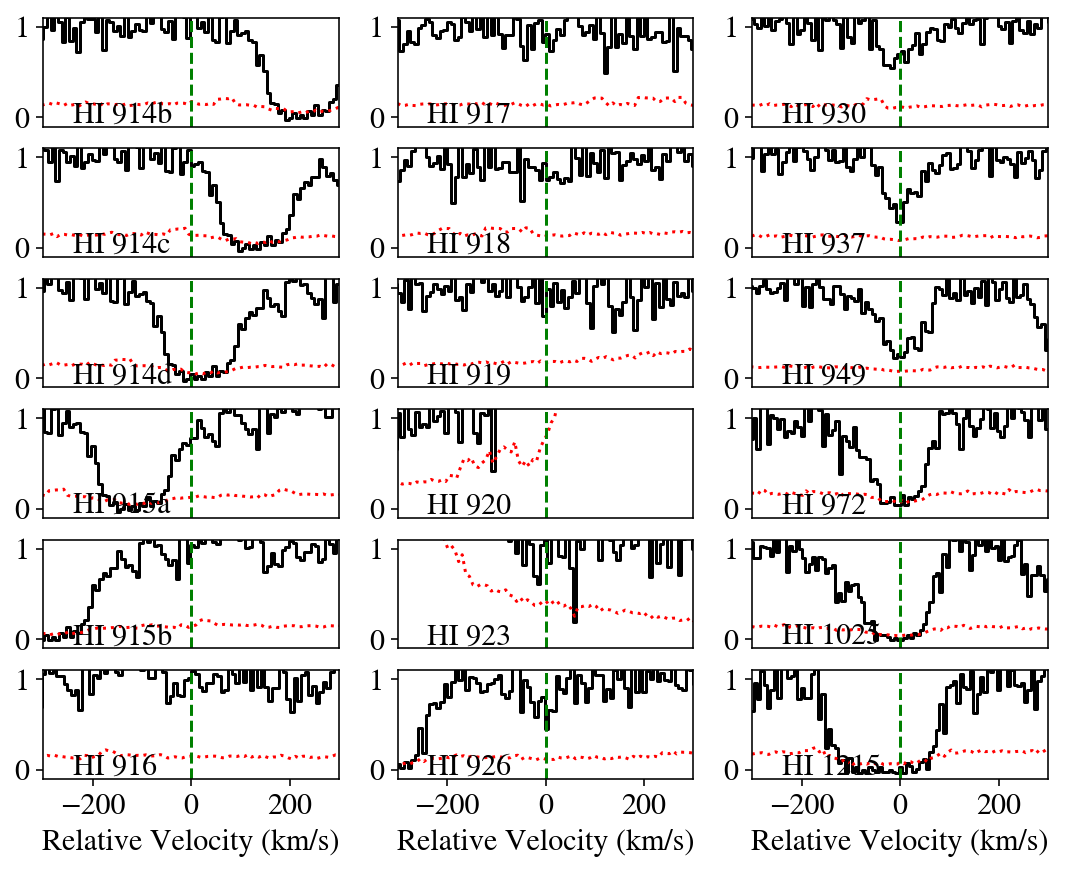

In [5]:
cgmsys_stack_plot(cgm_survey, cgm_name)

In [6]:
print_comps_and_lines(cgm_survey, cgm_name)

0 HI_z0.31818
	 HI 930
	 HI 937
	 HI 949
	 HI 972
	 HI 1025
	 HI 1215
1 OVI_z0.31820
	 OVI 1031
	 OVI 1037
2 CIII_z0.31820
	 CIII 977
3 HI_z0.31849
	 HI 915a
	 HI 915b
	 HI 916
	 HI 917
	 HI 918
	 HI 919
	 HI 920
	 HI 923
	 HI 926
	 HI 930
	 HI 937
	 HI 949
	 HI 972
	 HI 1025
	 HI 1215
4 SVI_z0.31863
	 SVI 933
	 SVI 944
5 CIII_z0.31867
	 CIII 977
6 OVI_z0.31868
	 OVI 1031
	 OVI 1037
7 SiIII_z0.31871
	 SiIII 1206
8 HI_z0.31878
	 HI 914b
	 HI 914c
	 HI 914d
	 HI 915a
	 HI 915b
	 HI 916
	 HI 917
	 HI 918
	 HI 919
	 HI 920
	 HI 923
	 HI 926
	 HI 930
	 HI 937
	 HI 949
	 HI 972
	 HI 1025
	 HI 1215


In [7]:
# cgm_abs_sys.stack_plot(cgm_abs_sys._components, [-300,300]*u.km/u.s, maxtrans=3, add_missing_lines=True)